In [1]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

In [2]:
import glob
import os



In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf


In [4]:
# #da=os.path.join('D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# df = pd.read_csv(r'D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# #df = pd.read_csv(r'C:\Users\Ron\Desktop\products_sold.csv')
# print(df)

In [5]:
Circumferential = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Circumferential Crack', "*.csv"))

cir = pd.concat((pd.read_csv(f) for f in Circumferential),axis = 1, ignore_index=True)


Gasket = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Gasket Leak', "*.csv"))

gas = pd.concat((pd.read_csv(g) for g in Gasket),axis = 1, ignore_index=True)


Longitudinal = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Longitudinal Crack', "*.csv"))

long = pd.concat((pd.read_csv(k) for k in Longitudinal),axis = 1, ignore_index=True)


NonLeak = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/NonLeak', "*.csv"))

non = pd.concat((pd.read_csv(l) for l  in NonLeak),axis = 1, ignore_index=True)


Orifice = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Orifice Leak', "*.csv"))

Ori = pd.concat((pd.read_csv(m) for m in Orifice),axis = 1, ignore_index=True)





In [6]:
cir

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,2996.926727,0.000000,-113.172939,0.000000,-5831.317138,0.000000,-16.616780,0.000000,-271.350365,0.000000,-217.853912,0.000000,3450.459835,0.000000,-212.802075
1,0.000039,3032.398590,0.000039,-110.099963,0.000039,-5639.000792,0.000039,-22.439262,0.000039,-265.770487,0.000039,-472.613815,0.000039,3634.194279,0.000039,-206.656122
2,0.000078,3028.638899,0.000078,-110.180830,0.000078,-5441.535304,0.000078,-33.518152,0.000078,-268.924331,0.000078,-696.642334,0.000078,3821.688413,0.000078,-205.281369
3,0.000117,3011.311630,0.000117,-109.857359,0.000117,-5234.670590,0.000117,-21.145378,0.000117,-271.269497,0.000117,-899.910822,0.000117,4004.278604,0.000117,-210.537776
4,0.000156,2944.863185,0.000156,-108.725210,0.000156,-5015.464283,0.000156,-25.997446,0.000156,-265.042677,0.000156,-1085.852041,0.000156,4148.863226,0.000156,-206.817857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.129609,-3215.880216,NaN,NaN
1001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.129648,-3316.819735,NaN,NaN
1001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.129688,-3436.312509,NaN,NaN
1001721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.129727,-3532.920211,NaN,NaN


In [7]:
cir = cir.drop(cir.columns[[0,2,4,6,8,10,12,14]],axis = 1)
cir

,1,3,5,7,9,11,13,15
0,2996.926727,-113.172939,-5831.317138,-16.616780,-271.350365,-217.853912,3450.459835,-212.802075
1,3032.398590,-110.099963,-5639.000792,-22.439262,-265.770487,-472.613815,3634.194279,-206.656122
2,3028.638899,-110.180830,-5441.535304,-33.518152,-268.924331,-696.642334,3821.688413,-205.281369
3,3011.311630,-109.857359,-5234.670590,-21.145378,-271.269497,-899.910822,4004.278604,-210.537776
4,2944.863185,-108.725210,-5015.464283,-25.997446,-265.042677,-1085.852041,4148.863226,-206.817857
...,...,...,...,...,...,...,...,...
1001718,NaN,NaN,NaN,NaN,NaN,NaN,-3215.880216,NaN
1001719,NaN,NaN,NaN,NaN,NaN,NaN,-3316.819735,NaN
1001720,NaN,NaN,NaN,NaN,NaN,NaN,-3436.312509,NaN
1001721,NaN,NaN,NaN,NaN,NaN,NaN,-3532.920211,NaN


In [8]:
cir
#cir=cir.iloc[0:1000]
cir.insert(8, "Label",'Circumferential', True)
cir

,1,3,5,7,9,11,13,15,Label
0,2996.926727,-113.172939,-5831.317138,-16.616780,-271.350365,-217.853912,3450.459835,-212.802075,Circumferential
1,3032.398590,-110.099963,-5639.000792,-22.439262,-265.770487,-472.613815,3634.194279,-206.656122,Circumferential
2,3028.638899,-110.180830,-5441.535304,-33.518152,-268.924331,-696.642334,3821.688413,-205.281369,Circumferential
3,3011.311630,-109.857359,-5234.670590,-21.145378,-271.269497,-899.910822,4004.278604,-210.537776,Circumferential
4,2944.863185,-108.725210,-5015.464283,-25.997446,-265.042677,-1085.852041,4148.863226,-206.817857,Circumferential
...,...,...,...,...,...,...,...,...,...
1001718,NaN,NaN,NaN,NaN,NaN,NaN,-3215.880216,NaN,Circumferential
1001719,NaN,NaN,NaN,NaN,NaN,NaN,-3316.819735,NaN,Circumferential
1001720,NaN,NaN,NaN,NaN,NaN,NaN,-3436.312509,NaN,Circumferential
1001721,NaN,NaN,NaN,NaN,NaN,NaN,-3532.920211,NaN,Circumferential


In [9]:
gas = gas.drop(gas.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#gas=gas.iloc[0:1000]

gas.insert(8, "Label",'Gasket', True)
gas

,1,3,5,7,9,11,13,15,Label
0,-215.632448,-126.111788,7317.138127,10640.541130,555.579825,-120.774513,-4319.267668,49.775687,Gasket
1,-221.859269,-134.683775,7041.781659,10434.412010,340.541871,-113.011204,-4326.133190,58.105071,Gasket
2,-217.088068,-140.021050,6737.982314,10167.719170,128.446283,-120.046703,-4283.468875,53.657342,Gasket
3,-223.638361,-130.316914,6442.192744,9815.615979,-77.928037,-106.946118,-4180.567779,53.414738,Gasket
4,-226.711337,-138.241959,6148.201288,9430.574625,-266.893355,-113.253807,-4012.689421,50.665233,Gasket
...,...,...,...,...,...,...,...,...,...
1028417,NaN,NaN,NaN,NaN,NaN,NaN,-1603.545086,NaN,Gasket
1028418,NaN,NaN,NaN,NaN,NaN,NaN,-1872.526427,NaN,Gasket
1028419,NaN,NaN,NaN,NaN,NaN,NaN,-2126.632471,NaN,Gasket
1028420,NaN,NaN,NaN,NaN,NaN,NaN,-2372.320077,NaN,Gasket


In [10]:
long = long.drop(long.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#long=long.iloc[0:1000]

long.insert(8, "Label",'Longitudinal', True)
long

,1,3,5,7,9,11,13,15,Label
0,3794.634988,-1419.565446,-4475.948686,-45.810058,437.213339,6240.558904,-88.265655,302.083238,Longitudinal
1,3497.946362,-1114.294917,-4656.985960,-47.589150,432.846478,6454.043943,-83.817926,307.824852,Longitudinal
2,3202.974117,-773.552526,-4825.763374,-47.993489,430.663047,6623.965610,-91.015161,304.185801,Longitudinal
3,2918.954013,-486.835253,-4966.670038,-56.565476,426.538789,6737.655384,-86.324828,299.576336,Longitudinal
4,2624.799092,-165.054779,-5100.384251,-50.581258,433.897759,6743.621850,-90.287351,297.231170,Longitudinal
...,...,...,...,...,...,...,...,...,...
1048567,NaN,4192.916992,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal
1048568,NaN,3872.117307,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal
1048569,NaN,3554.995580,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal
1048570,NaN,3228.065965,NaN,NaN,NaN,NaN,NaN,NaN,Longitudinal


In [11]:
non = non.drop(non.columns[[0,2,4,6,8,10,12,14]],axis = 1)

#non=non.iloc[0:1000]

non.insert(8, "Label",'NonLeak', True)
non

,1,3,5,7,9,11,13,15,Label
0,5991.193340,-2497.125457,-126.192656,-4.486610,51.554779,80.020246,-5589.552688,-627.660185,NonLeak
1,5964.548576,-2344.449327,-124.575300,-2.626650,35.785557,77.351609,-5724.247689,-712.907082,NonLeak
2,5917.634177,-2173.546871,-107.269589,-0.524087,44.357544,67.809208,-5831.235406,-805.591628,NonLeak
3,5849.714549,-2012.942697,-117.297197,-0.685823,49.452216,76.623798,-5891.553920,-893.453962,NonLeak
4,5787.189260,-1839.915198,-115.598973,-3.677932,45.489694,80.828924,-5901.198343,-990.388593,NonLeak
...,...,...,...,...,...,...,...,...,...
986610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1265.670949,NonLeak
986611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306.210221,NonLeak
986612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1376.908751,NonLeak
986613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1451.939097,NonLeak


In [12]:
#Ori=Ori.iloc[0:1000]
Ori = Ori.drop(Ori.columns[[0,2,4,6,8,10,12,14]],axis = 1)

Ori.insert(8, "Label",'Orifice', True)
Ori


,1,3,5,7,9,11,13,15,Label
0,-230.673859,-4864.994928,-117.863272,143.824944,2033.301686,224.692749,2132.279627,-1255.691976,Orifice
1,-231.239934,-5290.902484,-121.825794,136.385106,2343.557891,223.964938,2203.632015,-1413.762445,Orifice
2,-227.520015,-5680.193924,-121.583191,144.471887,2645.313925,222.509318,2274.902671,-1573.140632,Orifice
3,-233.423365,-6015.705441,-119.238025,144.310151,2944.045861,212.643446,2331.788424,-1725.326368,Orifice
4,-233.342497,-6326.125111,-126.192656,139.619818,3223.162020,218.223324,2378.866289,-1870.237920,Orifice
...,...,...,...,...,...,...,...,...,...
983306,NaN,NaN,241.836723,NaN,NaN,NaN,NaN,NaN,Orifice
983307,NaN,NaN,251.540860,NaN,NaN,NaN,NaN,NaN,Orifice
983308,NaN,NaN,248.063544,NaN,NaN,NaN,NaN,NaN,Orifice
983309,NaN,NaN,239.410689,NaN,NaN,NaN,NaN,NaN,Orifice


In [13]:
df1 = pd.concat([cir, gas,long,non,Ori])

In [14]:
df1

,1,3,5,7,9,11,13,15,Label
0,2996.926727,-113.172939,-5831.317138,-16.616780,-271.350365,-217.853912,3450.459835,-212.802075,Circumferential
1,3032.398590,-110.099963,-5639.000792,-22.439262,-265.770487,-472.613815,3634.194279,-206.656122,Circumferential
2,3028.638899,-110.180830,-5441.535304,-33.518152,-268.924331,-696.642334,3821.688413,-205.281369,Circumferential
3,3011.311630,-109.857359,-5234.670590,-21.145378,-271.269497,-899.910822,4004.278604,-210.537776,Circumferential
4,2944.863185,-108.725210,-5015.464283,-25.997446,-265.042677,-1085.852041,4148.863226,-206.817857,Circumferential
...,...,...,...,...,...,...,...,...,...
983306,NaN,NaN,241.836723,NaN,NaN,NaN,NaN,NaN,Orifice
983307,NaN,NaN,251.540860,NaN,NaN,NaN,NaN,NaN,Orifice
983308,NaN,NaN,248.063544,NaN,NaN,NaN,NaN,NaN,Orifice
983309,NaN,NaN,239.410689,NaN,NaN,NaN,NaN,NaN,Orifice


In [15]:
#df2 = df1.drop(df1.columns[[0,]],axis = 1)


In [16]:
#engine="numba"
#df2 = df1.T.drop_duplicates().T


In [17]:
df2=df1

In [18]:
#extracted_col = long["Sample"]


In [19]:
#df2 = df2.join(extracted_col)
#df2

In [20]:
# df2.columns.values[0] = "Circumferential Crack"
# df2.columns.values[1] = "Gasket Leak"
#  df2.columns.values[2] = "Longitudinal Crack"
# df2.columns.values[3] = "NonLeak"
# df2.columns.values[4] = "Orifice Leak"
# df2

In [21]:
df2=df2.dropna()
df2

,1,3,5,7,9,11,13,15,Label
0,2996.926727,-113.172939,-5831.317138,-16.616780,-271.350365,-217.853912,3450.459835,-212.802075,Circumferential
1,3032.398590,-110.099963,-5639.000792,-22.439262,-265.770487,-472.613815,3634.194279,-206.656122,Circumferential
2,3028.638899,-110.180830,-5441.535304,-33.518152,-268.924331,-696.642334,3821.688413,-205.281369,Circumferential
3,3011.311630,-109.857359,-5234.670590,-21.145378,-271.269497,-899.910822,4004.278604,-210.537776,Circumferential
4,2944.863185,-108.725210,-5015.464283,-25.997446,-265.042677,-1085.852041,4148.863226,-206.817857,Circumferential
...,...,...,...,...,...,...,...,...,...
917973,46.540975,-1115.030509,-227.520015,-73.628583,-1809.020350,2.872360,3053.403818,7080.768015,Orifice
917974,55.921640,-1145.271498,-238.922375,-80.259743,-1871.218709,-1.575369,3293.288423,6869.571484,Orifice
917975,62.714536,-1188.344475,-230.916463,-85.839621,-1915.354207,-0.685823,3542.899184,6659.764403,Orifice
917976,52.282589,-1209.022773,-236.819813,-63.115768,-1970.523580,-2.222311,3732.845291,6422.985629,Orifice


In [22]:
df2.isnull().sum()

1        0
3        0
5        0
7        0
9        0
11       0
13       0
15       0
Label    0
dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4576576 entries, 0 to 917977
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   1       float64
 1   3       float64
 2   5       float64
 3   7       float64
 4   9       float64
 5   11      float64
 6   13      float64
 7   15      float64
 8   Label   object 
dtypes: float64(8), object(1)
memory usage: 349.2+ MB


In [24]:
# data=df2

In [25]:
# df3=df2.iloc[0:3000]

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df2['Label']= label_encoder.fit_transform(df2['Label'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
y_train= df2[['Label']]
X_train= df2.drop(labels=['Label'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (4576576, 8) 
y_train has shape: (4576576, 1)


In [27]:
# data

In [28]:
# df3=df2.iloc[0:3000]

In [29]:
# cat_col=['Circumferential Crack','Gasket Leak','Longitudinal Crack','NonLeak','Orifice Leak']

In [30]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [31]:
#df2.label.value_counts()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train , y_train, test_size=0.25, random_state=42)


In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3432432, 8, 1)

In [34]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(1144144, 8, 1)

In [35]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Conv1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=20))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

2022-11-08 23:36:12.191562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:36:12.284204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:36:12.284955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:36:12.286102: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [36]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# summary of model layers
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 128)            512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [38]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [39]:
history = model.fit(X_train, y_train, epochs=300, batch_size=7000,validation_split=0.2 , callbacks=[early])


2022-11-08 23:36:15.342457: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-11-08 23:36:16.814101: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


393/393 [==============================] - 15s 19ms/step - loss: 6.5704 - accuracy: 0.8613 - val_loss: 0.1892 - val_accuracy: 0.9269
Epoch 2/300
393/393 [==============================] - 7s 19ms/step - loss: 0.2787 - accuracy: 0.9045 - val_loss: 0.1526 - val_accuracy: 0.9404
Epoch 3/300
393/393 [==============================] - 7s 19ms/step - loss: 0.2156 - accuracy: 0.9210 - val_loss: 0.1299 - val_accuracy: 0.9479
Epoch 4/300
393/393 [==============================] - 7s 18ms/step - loss: 0.1871 - accuracy: 0.9305 - val_loss: 0.1275 - val_accuracy: 0.9519
Epoch 5/300
393/393 [==============================] - 8s 20ms/step - loss: 0.1673 - accuracy: 0.9373 - val_loss: 0.1119 - val_accuracy: 0.9543
Epoch 6/300
393/393 [==============================] - 8s 19ms/step - loss: 0.1499 - accuracy: 0.9430 - val_loss: 0.0919 - val_accuracy: 0.9658
Epoch 7/300
393/393 [==============================] - 7s 19ms/step - loss: 0.1348 - accuracy: 0.9483 - val_loss: 0.0877 - val_accuracy: 0.9670
Epo

In [40]:
model.evaluate(X_test, y_test, verbose=1)


35755/35755 [==============================] - 70s 2ms/step - loss: 0.0468 - accuracy: 0.9809


[0.04684358835220337, 0.9809158444404602]

Text(0, 0.5, 'Loss')

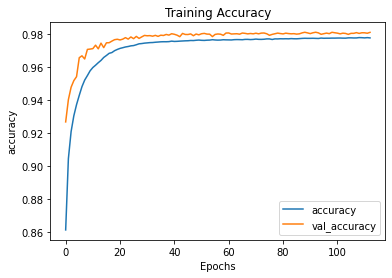

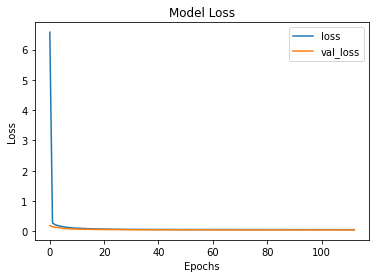

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")